# Model2 - Logistic Regression

In [1]:
# update sklearn
#!pip install sklearn --upgrade

In [2]:
# install joblib used to save model - restart kernel after installing 
#!pip install joblib

### Read CSV and Data Cleaning

In [3]:
import pandas as pd
df = pd.read_csv('./resources/exoplanet_data.csv')
df = df.dropna(axis='columns', how='all')  # Drop the null columns where all values are null
df = df.dropna()  # Drop the null rows
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
# features and targets (https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html)
df.dtypes

koi_disposition       object
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq                int64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_plnt_num       int64
koi_steff              int64
koi_steff_err1         int64
koi_steff_err2         int64
koi_slogg            float64
koi_slogg_err1       float64
koi_slogg_err2

### Select your features (columns)

In [5]:
# features and targets
X = df.drop(['ra', 'dec', 'koi_disposition'], axis=1)
y = df['koi_disposition']
print(X.shape, y.shape)

(6991, 38) (6991,)


In [6]:
# target categories
labels = list(y.unique())
labels

['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']

In [7]:
# target category encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y)
y_encoded = label_encoder.transform(y)

### Split Data into Train & Test Subsets

In [8]:
# split 75/25 (train/test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=1)

### Pre-processing - Scaling & Selection

In [9]:
# scale with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# feature selction with chi2 - reduce number of features 50%
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func=chi2, k=20)
X_train_scaled_selected = fs.fit_transform(X_train_scaled, y_train)
X_test_scaled_selected = fs.fit_transform(X_test_scaled, y_test)
print(X_train_scaled_selected.shape, X_test_scaled_selected.shape)

(5243, 20) (1748, 20)


### Define, Train, and Test a Model

In [11]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter=10000)
model2.fit(X_train_scaled_selected, y_train)
print(f'Training Data Score: {model2.score(X_train_scaled_selected, y_train)}')
print(f'Testing Data Score: {model2.score(X_test_scaled_selected, y_test)}')

Training Data Score: 0.8407400343314896
Testing Data Score: 0.8203661327231121


### Hyperparameter Tuning

In [12]:
# define grid search model parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 
              'solver':["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
              'penalty': ['l1', 'l2']}
grid2 = GridSearchCV(model2, param_grid, verbose=3)

In [13]:
# train grid search parameters
grid2.fit(X_train_scaled_selected, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] ... C=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] ... C=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] ... C=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] ... C=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] ... C=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] ....... C=0.1, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver new

[CV] ...... C=0.1, penalty=l1, solver=saga, score=0.814, total=   0.0s
[CV] C=0.1, penalty=l1, solver=saga ..................................
[CV] ...... C=0.1, penalty=l1, solver=saga, score=0.807, total=   0.0s
[CV] C=0.1, penalty=l1, solver=saga ..................................
[CV] ...... C=0.1, penalty=l1, solver=saga, score=0.807, total=   0.0s
[CV] C=0.1, penalty=l1, solver=saga ..................................
[CV] ...... C=0.1, penalty=l1, solver=saga, score=0.810, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] . C=0.1, penalty=l2, solver=newton-cg, score=0.838, total=   0.1s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] . C=0.1, penalty=l2, solver=newton-cg, score=0.827, total=   0.1s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] . C=0.1, penalty=l2, solver=newton-cg, score=0.817, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] .

/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarnin

[CV] ... C=1, penalty=l1, solver=liblinear, score=0.868, total=   0.1s
[CV] C=1, penalty=l1, solver=liblinear ...............................
[CV] ... C=1, penalty=l1, solver=liblinear, score=0.856, total=   0.0s
[CV] C=1, penalty=l1, solver=sag .....................................
[CV] ........... C=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, penalty=l1, solver=sag .....................................
[CV] ........... C=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, penalty=l1, solver=sag .....................................
[CV] ........... C=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, penalty=l1, solver=sag .....................................
[CV] ........... C=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, penalty=l1, solver=sag .....................................
[CV] ........... C=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, penalty=l1, solver=saga ....................................


/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] ........ C=1, penalty=l1, solver=saga, score=0.871, total=   2.3s
[CV] C=1, penalty=l1, solver=saga ....................................
[CV] ........ C=1, penalty=l1, solver=saga, score=0.875, total=   2.2s
[CV] C=1, penalty=l1, solver=saga ....................................
[CV] ........ C=1, penalty=l1, solver=saga, score=0.869, total=   2.0s
[CV] C=1, penalty=l1, solver=saga ....................................
[CV] ........ C=1, penalty=l1, solver=saga, score=0.872, total=   2.2s
[CV] C=1, penalty=l1, solver=saga ....................................
[CV] ........ C=1, penalty=l1, solver=saga, score=0.861, total=   2.3s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ... C=1, penalty=l2, solver=newton-cg, score=0.847, total=   0.1s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ... C=1, penalty=l2, solver=newton-cg, score=0.840, total=   0.1s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] .

/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarnin

[CV] .. C=10, penalty=l1, solver=liblinear, score=0.881, total=   0.1s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV] .. C=10, penalty=l1, solver=liblinear, score=0.875, total=   0.1s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV] .. C=10, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV] .. C=10, penalty=l1, solver=liblinear, score=0.871, total=   0.1s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV] .. C=10, penalty=l1, solver=liblinear, score=0.868, total=   0.1s
[CV] C=10, penalty=l1, solver=sag ....................................
[CV] .......... C=10, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, penalty=l1, solver=sag ....................................
[CV] .......... C=10, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, penalty=l1, solver=sag ....................................
[CV] .

/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] ....... C=10, penalty=l1, solver=saga, score=0.888, total=   4.9s
[CV] C=10, penalty=l1, solver=saga ...................................
[CV] ....... C=10, penalty=l1, solver=saga, score=0.882, total=   4.2s
[CV] C=10, penalty=l1, solver=saga ...................................
[CV] ....... C=10, penalty=l1, solver=saga, score=0.878, total=   3.9s
[CV] C=10, penalty=l1, solver=saga ...................................
[CV] ....... C=10, penalty=l1, solver=saga, score=0.879, total=   3.9s
[CV] C=10, penalty=l1, solver=saga ...................................
[CV] ....... C=10, penalty=l1, solver=saga, score=0.867, total=   3.7s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] .. C=10, penalty=l2, solver=newton-cg, score=0.870, total=   0.1s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] .. C=10, penalty=l2, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] .

/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarnin

[CV] . C=100, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] . C=100, penalty=l1, solver=liblinear, score=0.871, total=   0.1s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] . C=100, penalty=l1, solver=liblinear, score=0.874, total=   0.1s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] . C=100, penalty=l1, solver=liblinear, score=0.865, total=   0.1s
[CV] C=100, penalty=l1, solver=sag ...................................
[CV] ......... C=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=sag ...................................
[CV] ......... C=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=sag ...................................
[CV] ......... C=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=sag ...................................
[CV] .

/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/anthonyvanderwal/opt/anaconda3/envs/class_31/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] ...... C=100, penalty=l1, solver=saga, score=0.885, total=   5.5s
[CV] C=100, penalty=l1, solver=saga ..................................
[CV] ...... C=100, penalty=l1, solver=saga, score=0.881, total=   4.0s
[CV] C=100, penalty=l1, solver=saga ..................................
[CV] ...... C=100, penalty=l1, solver=saga, score=0.882, total=   4.0s
[CV] C=100, penalty=l1, solver=saga ..................................
[CV] ...... C=100, penalty=l1, solver=saga, score=0.876, total=   4.7s
[CV] C=100, penalty=l1, solver=saga ..................................
[CV] ...... C=100, penalty=l1, solver=saga, score=0.868, total=   4.1s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] . C=100, penalty=l2, solver=newton-cg, score=0.879, total=   0.1s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] . C=100, penalty=l2, solver=newton-cg, score=0.883, total=   0.1s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.1min finished


GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [14]:
# report 'best' score parameters from training dataset
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.8786932665788573


### Save the Model

In [15]:
# create an instance of the model with 'best' parameters from grid search
model2_best = LogisticRegression(max_iter=10000, 
                                 C=grid2.best_params_['C'], 
                                 solver=grid2.best_params_['solver'],
                                 penalty=grid2.best_params_['penalty'])
model2_best.fit(X_train_scaled_selected, y_train)

LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='saga')

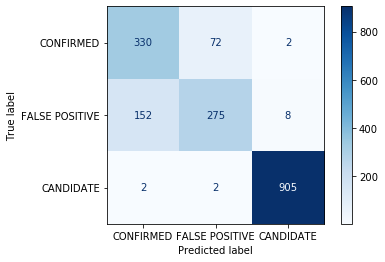

In [16]:
# test 'best' model parameters - confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model2_best, X_test_scaled_selected, y_test, 
                      cmap='Blues', normalize=None, display_labels=labels);
plt.savefig('./analysis/anthony_vanderwal_svc.png')

In [17]:
# save 'best' model
import joblib
filename = './analysis/anthony_vanderwal_logreg.sav'
joblib.dump(model2_best, filename)

['./analysis/anthony_vanderwal_logreg.sav']